In [0]:
import pickle
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [0]:
with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 28, 28)

    

In [0]:
with open('train_label.pkl', 'rb') as f:
    label = pickle.load(f)
    label = np.array(label)
    label = label.reshape(-1, 1)

In [0]:
label.shape

(8000, 1)

In [0]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, random_state=42)

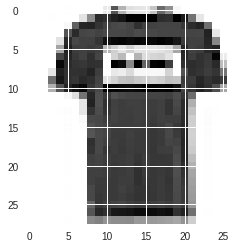

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data[0], interpolation='nearest')
plt.show()

In [0]:
data_train = data_train.reshape(data_train.shape[0], 1, 28, 28).astype('float32')
data_test = data_test.reshape(data_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
label_train.shape

(6400, 7)

In [0]:

label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]
print(num_classes)

7


In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5,input_shape=(1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(7, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
model = cnn_model()
history = model.fit(data_train, label_train, validation_data=(data_test, label_test), epochs=20, batch_size=32, verbose=2)
scores = model.evaluate(data_test, label_test, verbose=0)
print('CNN Error {}'.format(100-scores[1]*100))

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
 - 4s - loss: 1.0526 - acc: 0.5445 - val_loss: 0.7397 - val_acc: 0.6756
Epoch 2/20
 - 3s - loss: 0.7302 - acc: 0.6761 - val_loss: 0.6243 - val_acc: 0.7163
Epoch 3/20
 - 3s - loss: 0.6432 - acc: 0.7259 - val_loss: 0.5830 - val_acc: 0.7531
Epoch 4/20
 - 3s - loss: 0.5852 - acc: 0.7636 - val_loss: 0.5381 - val_acc: 0.7781
Epoch 5/20
 - 3s - loss: 0.5533 - acc: 0.7717 - val_loss: 0.5364 - val_acc: 0.7812
Epoch 6/20
 - 3s - loss: 0.5347 - acc: 0.7883 - val_loss: 0.4754 - val_acc: 0.7963
Epoch 7/20
 - 3s - loss: 0.4927 - acc: 0.8033 - val_loss: 0.4983 - val_acc: 0.7850
Epoch 8/20
 - 3s - loss: 0.4794 - acc: 0.8117 - val_loss: 0.4803 - val_acc: 0.8000
Epoch 9/20
 - 3s - loss: 0.4385 - acc: 0.8230 - val_loss: 0.4307 - val_acc: 0.8237
Epoch 10/20
 - 3s - loss: 0.4530 - acc: 0.8203 - val_loss: 0.4468 - val_acc: 0.8037
Epoch 11/20
 - 3s - loss: 0.4098 - acc: 0.8367 - val_loss: 0.3941 - val_acc: 0.8406
Epoch 12/20
 - 3s - loss: 0.4127 - ac

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 12, 12)        48        
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 10, 10)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 8, 8)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 4, 4)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


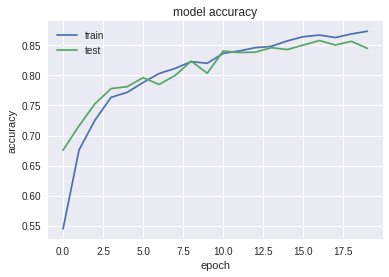

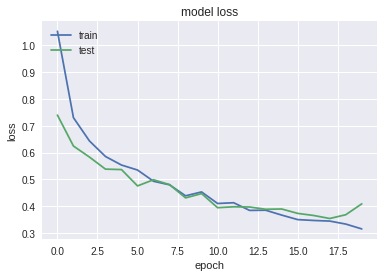

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    test_data = np.array(test_data)
    test_data = test_data.reshape(-1, 1, 28, 28)

In [0]:
import pandas as pd

In [0]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)
predictions = pd.Series(predictions, name="Label")
submit = pd.concat([pd.Series(range(2000),name = "ImageId"), predictions], axis=1)
submit.to_csv("result.csv", index=False)

In [0]:
model.save('midas.model')